In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
df = pd.read_csv(r"C:\Users\aisha\Downloads\bankchurners.csv")

 1.Explore the dataset and extract insights using Exploratory Data Analysis

In [11]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998

In [12]:
np.unique(df["Attrition_Flag"])

array(['Attrited Customer', 'Existing Customer'], dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [14]:
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
count         10127.000000           10127.000000   
mean              0.712222               0.274894   
std               0.238086               0.275691   
min               0.000000               0.000000   
25%               0.582000               0.023000   
50%               0.702000               0.176000   
75%               0.818000               0.503000   
max               3.714000               0.999000   

       Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
count                                       10127.000000                                                                                    
mean                                            0.159997                                                                                    
std                                             0.365301                                                                                    
min                                             0.000008                                                                                    
25%                                             0.000099                                                                                    
50%                                             0.000181                                                                                    
75%                                             

Checking for the missing values

In [15]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

C:\Users\aisha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aisha\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

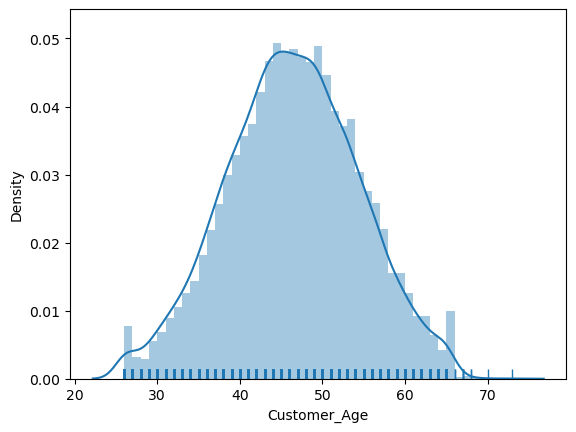

In [16]:
sns.distplot(df['Customer_Age'], kde=True, rug=True)

C:\Users\aisha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aisha\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Dependent_count', ylabel='Density'>

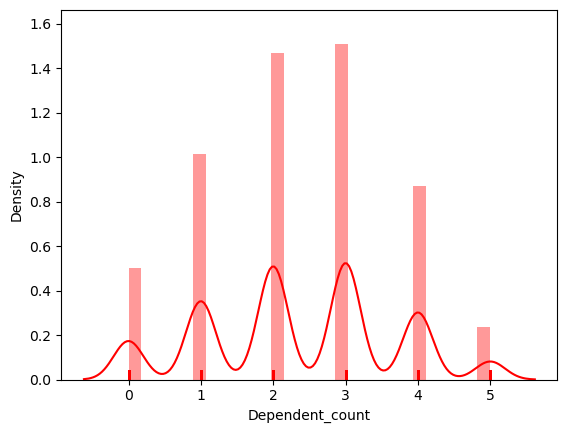

In [17]:
sns.distplot(df['Dependent_count'], kde=True, rug=True,color='red')

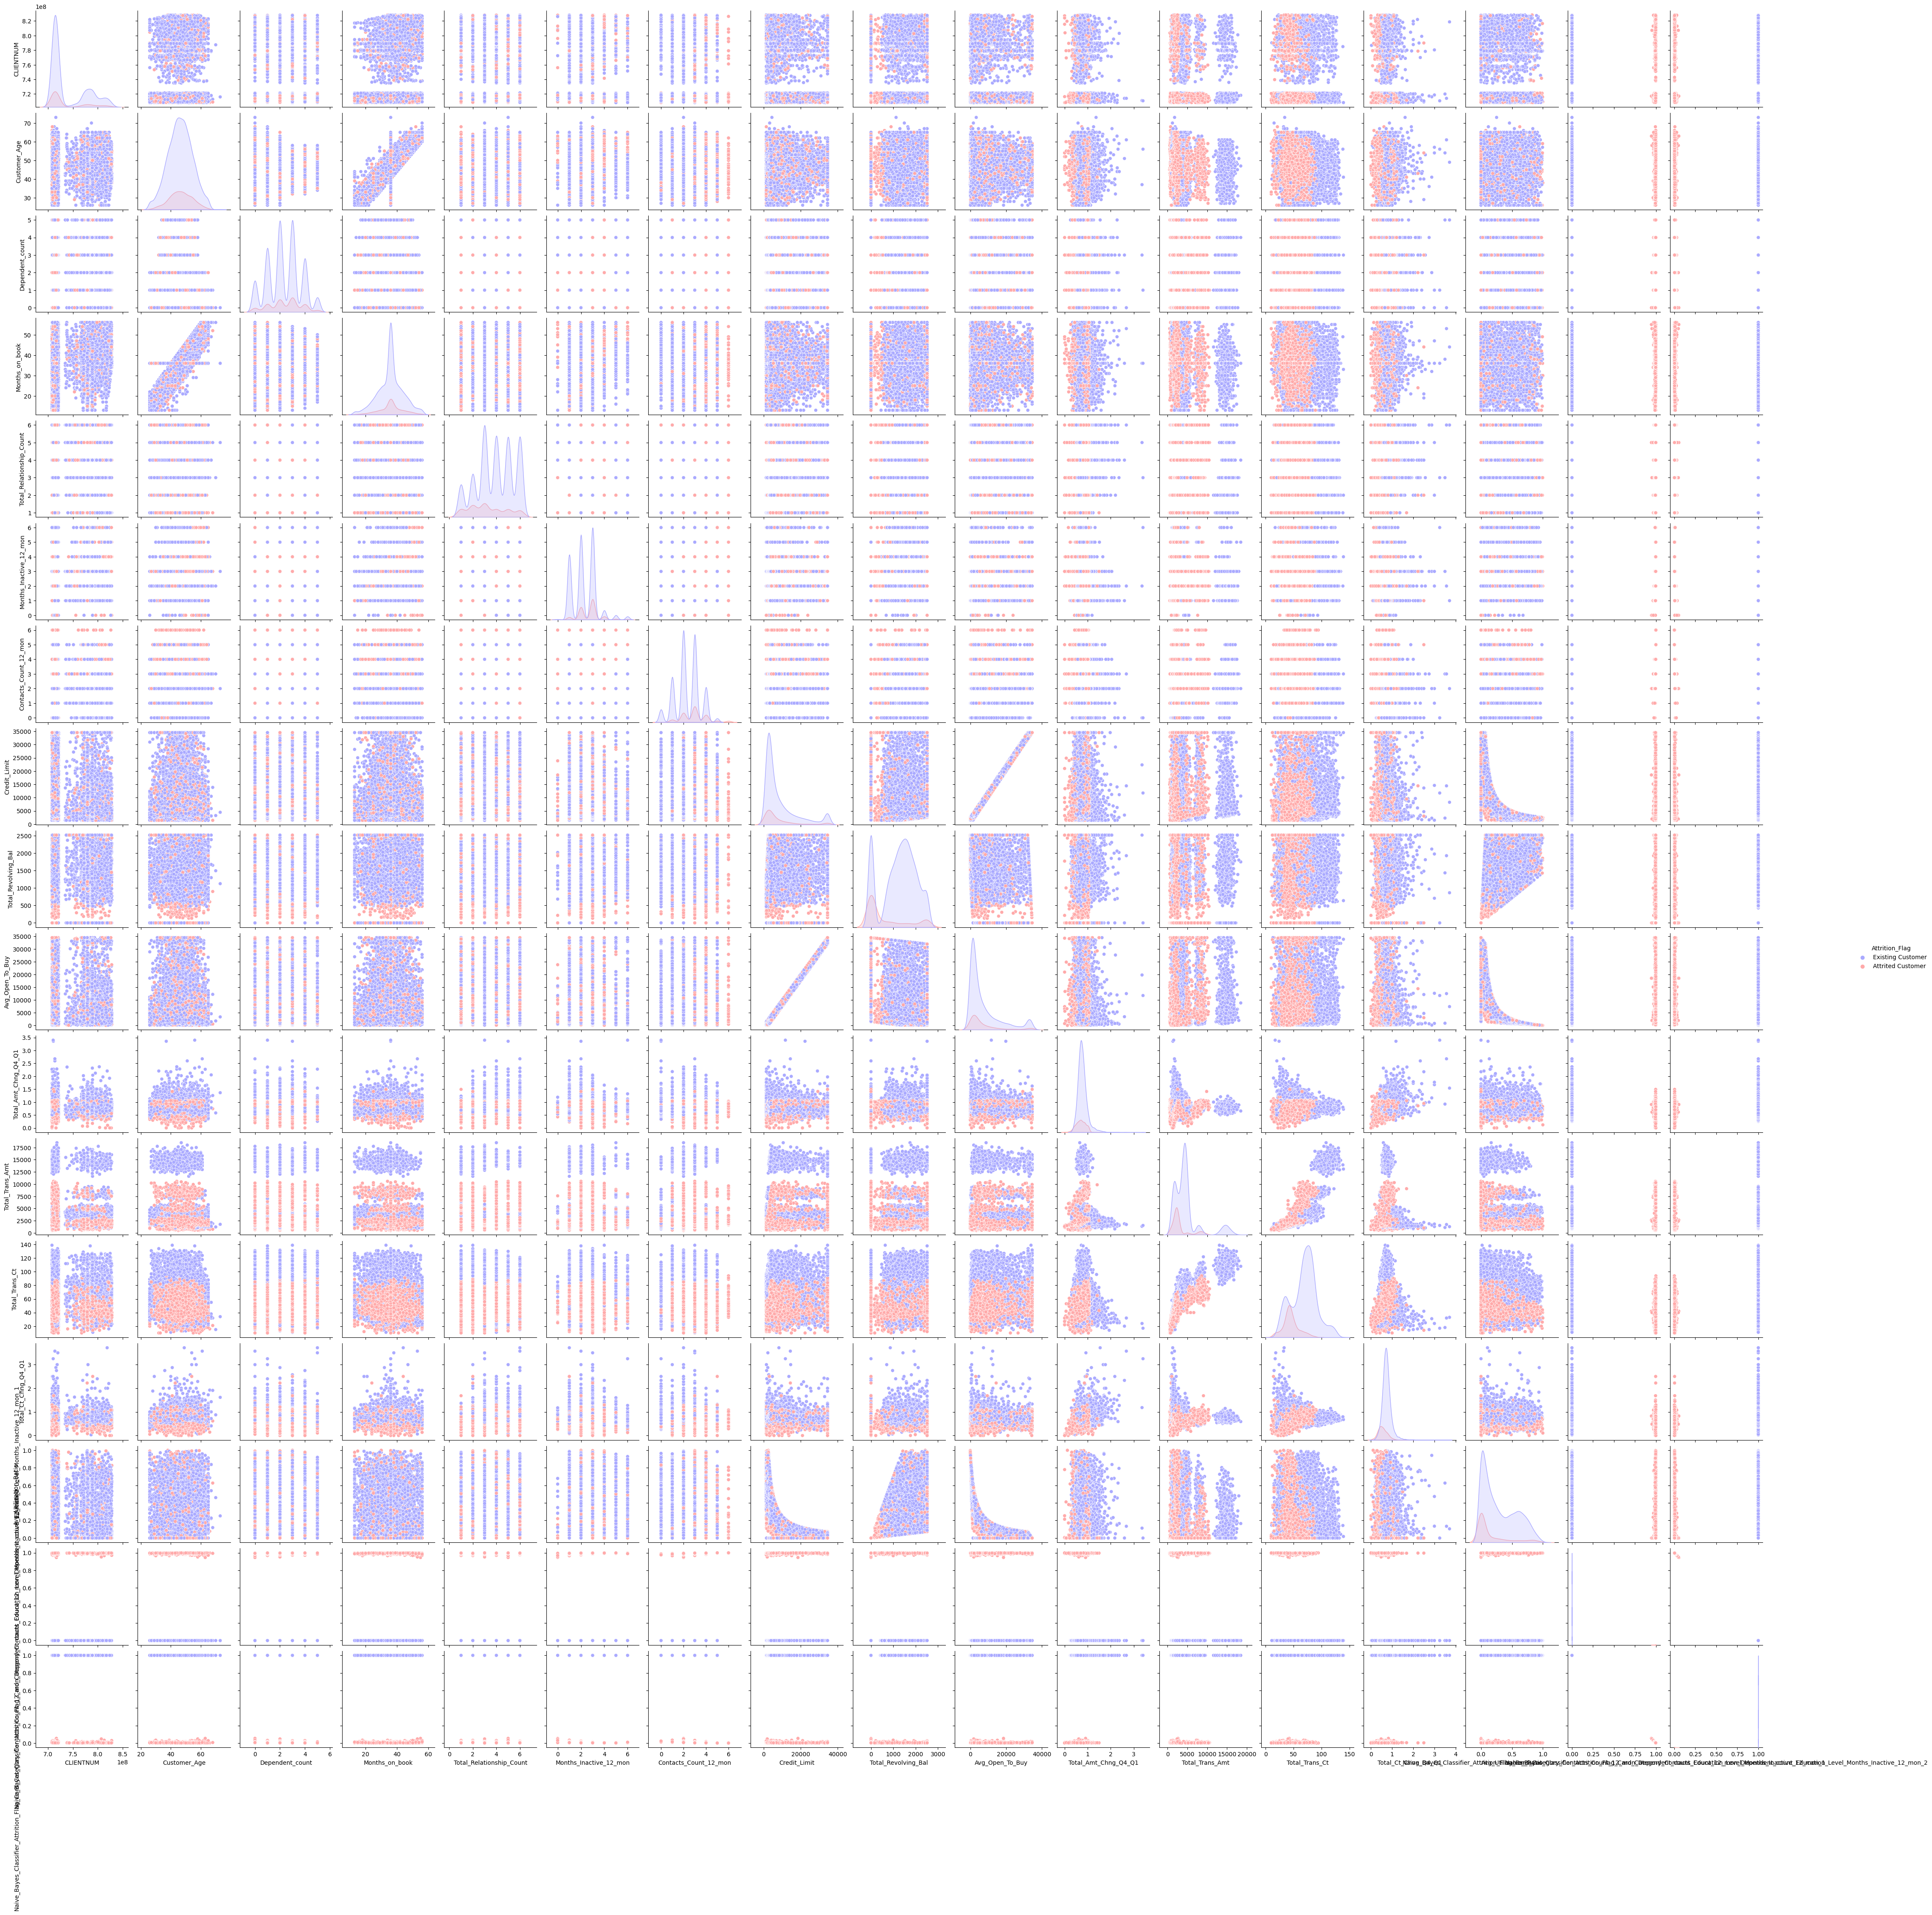

In [18]:
sns.pairplot(df,hue='Attrition_Flag',palette='bwr')

In [19]:
columns = df.columns

In [20]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
encodingList = ['Attrition_Flag', 'Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
for i in encodingList:
    df[i] = labelencoder.fit_transform(df[i])

In [21]:
df

CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0      768805383               1            45       1                3   
1      818770008               1            49       0                5   
2      713982108               1            51       1                3   
3      769911858               1            40       0                4   
4      709106358               1            40       1                3   
...          ...             ...           ...     ...              ...   
10122  772366833               1            50       1                2   
10123  710638233               0            41       1                2   
10124  716506083               0            44       0                1   
10125  717406983               0            30       1                2   
10126  714337233               0            43       0                2   

       Education_Level  Marital_Status  Income_Category  Card_Category  \
0                    3               1                2              0   
1                    2               2                4              0   
2                    2               1                3              0   
3                    3               3                4              0   
4                    5               1                2              0   
...                ...             ...              ...            ...   
10122                2               2                1              0   
10123                6               0                1              0   
10124                3               1                4              0   
10125                2               3                1              0   
10126                2               1                4              3   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...   

In [22]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop.append('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1')
# Drop features 
df.drop(to_drop, axis=1, inplace=True)

C:\Users\aisha\AppData\Local\Temp\ipykernel_6264\3990311020.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [23]:
df

CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0      768805383               1            45       1                3   
1      818770008               1            49       0                5   
2      713982108               1            51       1                3   
3      769911858               1            40       0                4   
4      709106358               1            40       1                3   
...          ...             ...           ...     ...              ...   
10122  772366833               1            50       1                2   
10123  710638233               0            41       1                2   
10124  716506083               0            44       0                1   
10125  717406983               0            30       1                2   
10126  714337233               0            43       0                2   

       Education_Level  Marital_Status  Income_Category  Card_Category  \
0                    3               1                2              0   
1                    2               2                4              0   
2                    2               1                3              0   
3                    3               3                4              0   
4                    5               1                2              0   
...                ...             ...              ...            ...   
10122                2               2                1              0   
10123                6               0                1              0   
10124                3               1                4              0   
10125                2               3                1              0   
10126                2               1                4              3   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                     1.335             1144              42   
1                     1.541             1291              33   
2                     2.594             1887              20   
3                     1.405             1171              20   
4                     2.175              816              28   
...                     ...              ...             ...   
10122                 0.703            15476             117   

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int32  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int32  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int32  
 6   Marital_Status            10127 non-null  int32  
 7   Income_Category           10127 non-null  int32  
 8   Card_Category             10127 non-null  int32  
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Detecting Outliers 

<AxesSubplot:>

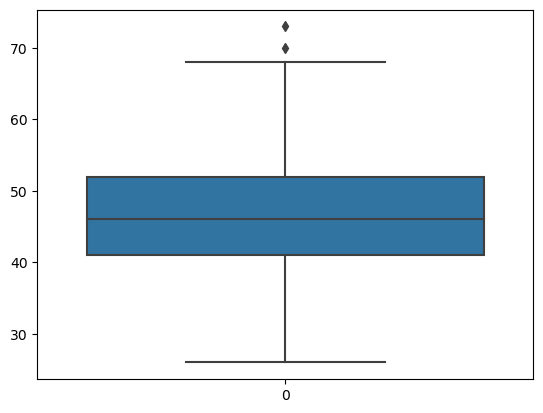

In [25]:
sns.boxplot(data=df['Customer_Age'])

<AxesSubplot:>

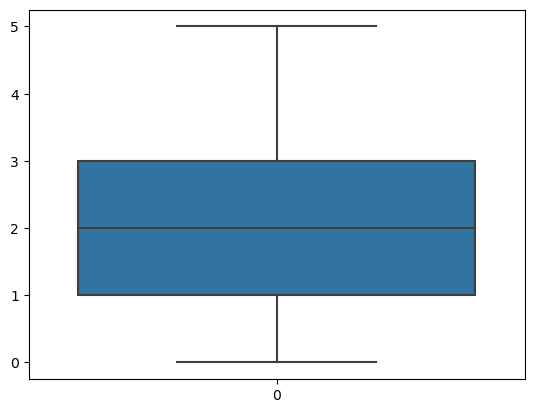

In [26]:
sns.boxplot(data=df['Dependent_count'])

<AxesSubplot:>

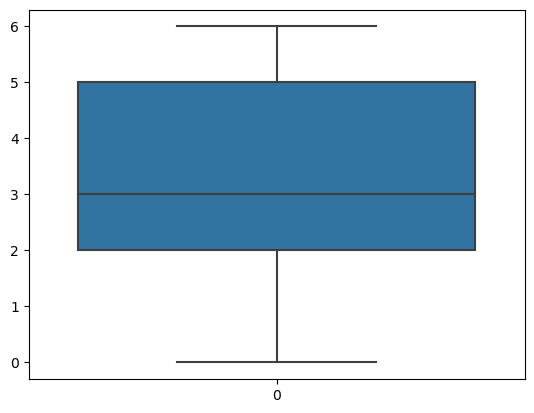

In [27]:
sns.boxplot(data=df['Education_Level'])

<AxesSubplot:>

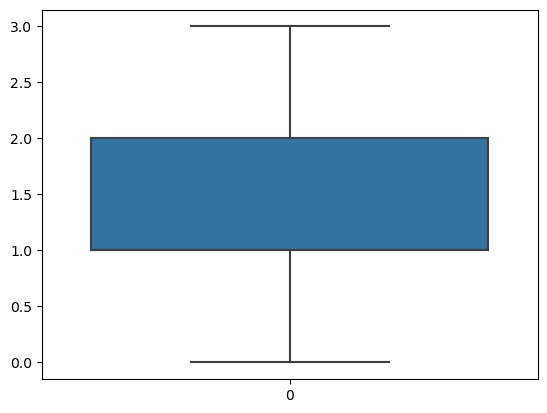

In [28]:
sns.boxplot(data=df['Marital_Status'])

<AxesSubplot:>

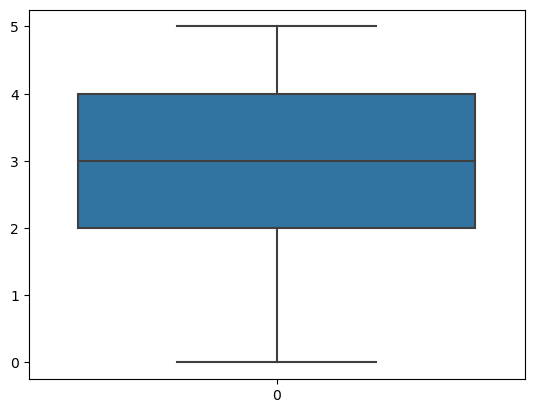

In [29]:

sns.boxplot(data=df['Income_Category'])

<AxesSubplot:>

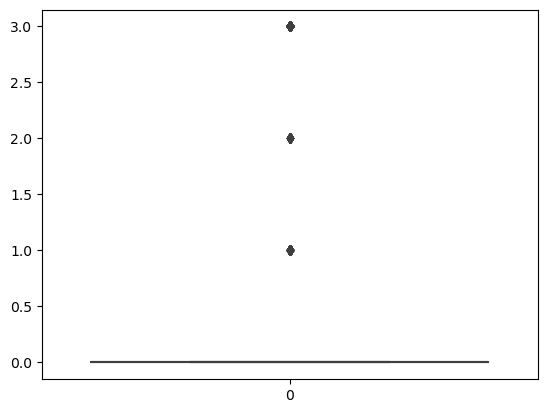

In [30]:


sns.boxplot(data=df['Card_Category'])

<AxesSubplot:>

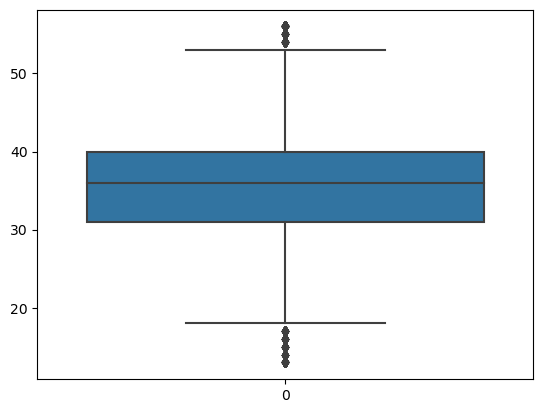

In [31]:
sns.boxplot(data=df['Months_on_book'])

<AxesSubplot:>

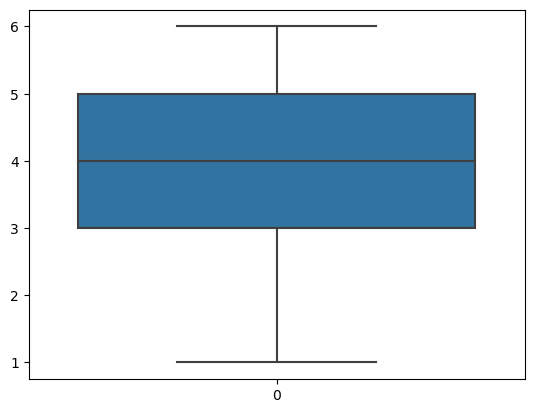

In [32]:
sns.boxplot(data=df['Total_Relationship_Count'])

<AxesSubplot:>

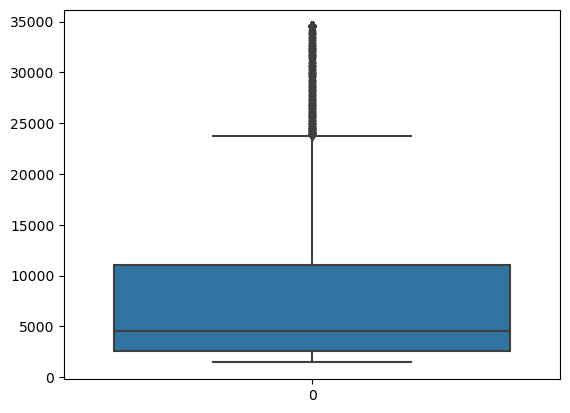

In [33]:
sns.boxplot(data=df['Credit_Limit'])

<AxesSubplot:>

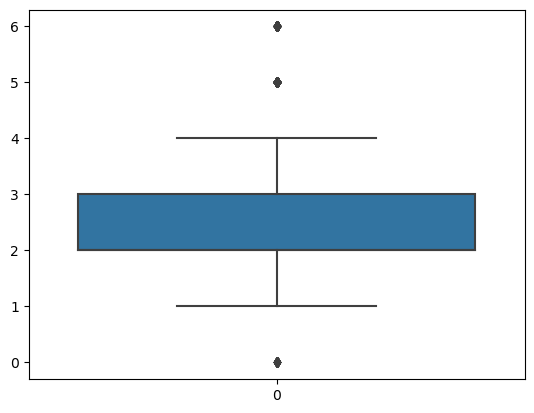

In [34]:


sns.boxplot(data=df['Months_Inactive_12_mon'])

<AxesSubplot:>

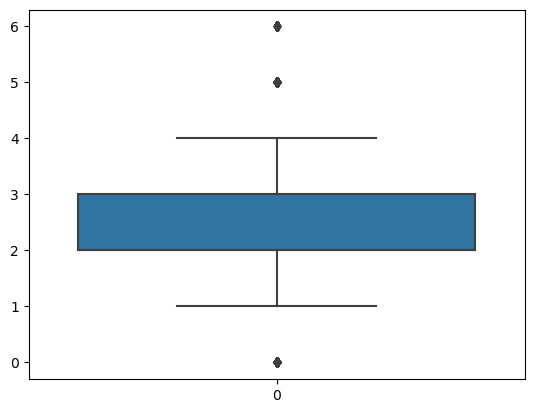

In [35]:
sns.boxplot(data=df['Contacts_Count_12_mon'])

<AxesSubplot:>

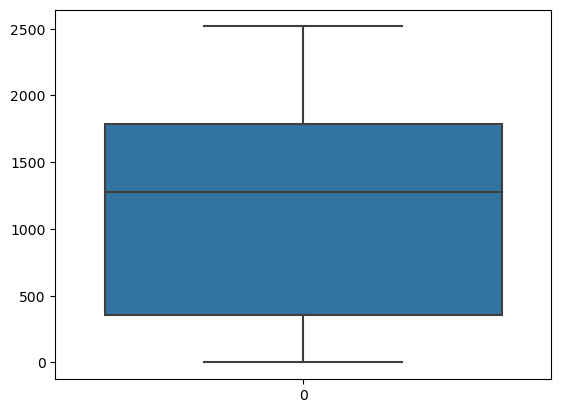

In [36]:
sns.boxplot(data=df['Total_Revolving_Bal'])

<AxesSubplot:>

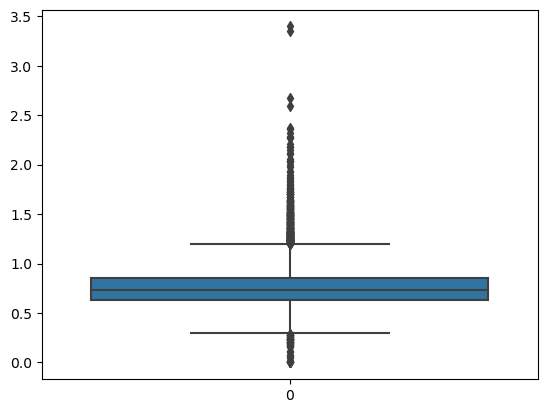

In [37]:
sns.boxplot(data=df['Total_Amt_Chng_Q4_Q1'])

<AxesSubplot:>

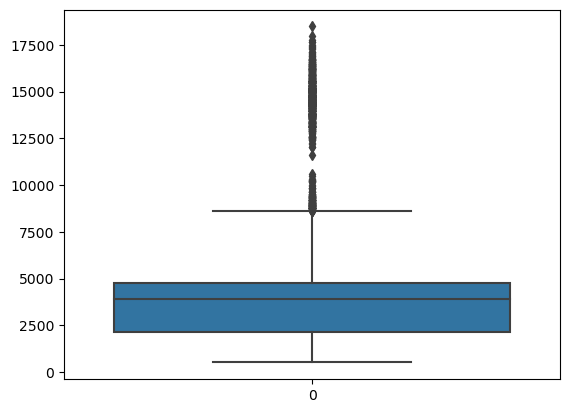

In [38]:
sns.boxplot(data=df['Total_Trans_Amt'])

<AxesSubplot:>

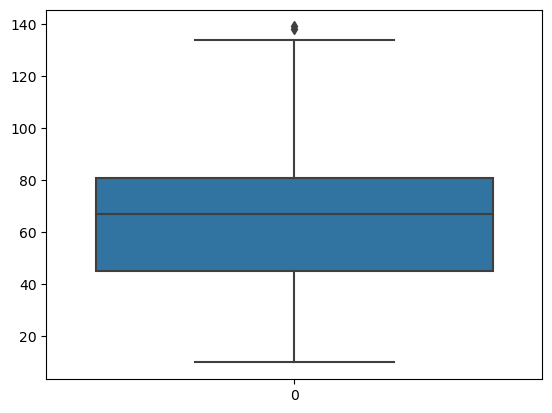

In [39]:
sns.boxplot(data=df['Total_Trans_Ct'])

<AxesSubplot:>

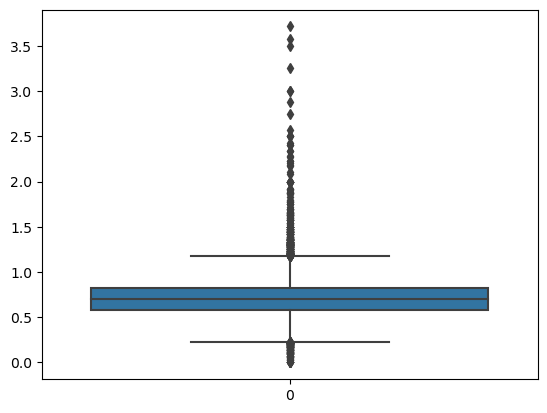

In [40]:
sns.boxplot(data=df['Total_Ct_Chng_Q4_Q1'])

<AxesSubplot:>

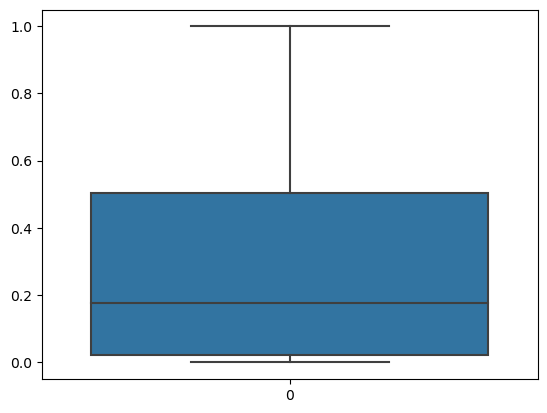

In [41]:
sns.boxplot(data=df['Avg_Utilization_Ratio'])

From the above plots we can see that there are a lot of outliers present in various attributes such as - Total_Ct_Chng_Q4_Q1, Total_Trans_Amt, Total_Amt_Chng_Q4_Q1, Credit_Limit and Months_on_book. Therefore, we will remove these outliers from our dataset using the Z-score method.

### Removing Outliers 

In [42]:
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [43]:
df

CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
5      713061558               1            44       1                2   
10     708790833               1            42       1                5   
14     712396908               1            57       0                2   
19     709327383               1            45       0                2   
20     806165208               1            47       1                1   
...          ...             ...           ...     ...              ...   
10118  713755458               0            50       1                1   
10119  716893683               0            55       0                3   
10123  710638233               0            41       1                2   
10124  716506083               0            44       0                1   
10125  717406983               0            30       1                2   

       Education_Level  Marital_Status  Income_Category  Card_Category  \
5                    2               1                1              0   
10                   5               3                0              0   
14                   2               1                4              0   
19                   2               1                5              0   
20                   1               0                2              0   
...                ...             ...              ...            ...   
10118                6               3                3              0   
10119                5               2                5              0   
10123                6               0                1              0   
10124                3               1                4              0   
10125                2               3                1              0   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
5                  36                         3                       1   
10                 31                         5                       3   
14                 48                         5                       2   
19                 37                         6                       1   
20                 42                         5                       2   
...               ...                       ...                     ...   
10118              36                         6                       3   
10119              47                         4                       3   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
5                          2        4010.0                 1247   
10                         2        6748.0                 1467   
14                         2        2436.0                  680   
19                         2       14470.0                 1157   
20                         0       20979.0                 1800   
...                      ...           ...                  ...   
10118                      4        9959.0                  952   
10119                      3       14657.0                 2517   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
5                     1.376             1088              24   
10                    0.831             1201              42   
14                    1.190             1570              29   
19                    0.966             1207              21   
20                    0.906             1178              27   
...                     ...              ...             ...   
10118                 0.825            10310              63   

As seen in the scatter plot of the highly correlated independent variables, there were outliers in the data. Hence, we have removed them using Z-score and 0.3 as the threshold value

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [46]:
df['Attrition_Flag'].value_counts()

1    7381
0    1461
Name: Attrition_Flag, dtype: int64

In [47]:
X = df[['CLIENTNUM', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
        'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
y = df['Attrition_Flag']

In [48]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
len(X_train),len(X_test)

(6189, 2653)

In [50]:
len(df)

8842

In [51]:
0.2*8842

1768.4

### Logistic Regression 

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

#### Predictions and Evaluations

In [54]:
predictions = logmodel.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
print(accuracy_score(y_test,predictions))

0.8303807010931021


In [57]:
tp, fp, tn, fn = get_confusion_matrix(y_test.to_list(), predictions)
print(tp, fp, tn, fn)

NameError: name 'get_confusion_matrix' is not defined

Under Sampling - Logistic Regression 

In [ ]:
from collections import Counter
Counter(y_train)

In [ ]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(sampling_strategy=0.8)
X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)

In [ ]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train_ns,y_train_ns)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=classifier.predict(X_test)
print(accuracy_score(y_test,y_pred))

Over Sampling - Logistic Regression 

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
os=RandomOverSampler(sampling_strategy=0.75)
X_train_os,y_train_os=os.fit_resample(X_train,y_train)

In [ ]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train_os,y_train_os)

In [ ]:
y_pred=classifier.predict(X_test)
print(accuracy_score(y_test,y_pred))

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

#### Predictions and Evaluations

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
print(accuracy_score(y_test,predictions))

In [ ]:
def get_confusion_matrix(true_labels, predicted_labels):
    # assert len(true_labels) == len(predicted_labels), "Input lists must have the same length"
    n = len(true_labels)
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(n):
        if true_labels[i] == 1 and predicted_labels[i] == 1:
            tp += 1
        elif true_labels[i] == 0 and predicted_labels[i] == 1:
            fp += 1
        elif true_labels[i] == 0 and predicted_labels[i] == 0:
            tn += 1
        elif true_labels[i] == 1 and predicted_labels[i] == 0:
            fn += 1
    return tp, fp, tn, fn

tp, fp, tn, fn = get_confusion_matrix(y_test.to_list(), predictions)
print(tp, fp, tn, fn)

In [ ]:
feat_importances = pd.Series(dtree.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

### Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=600,)

In [ ]:
rfc.fit(X_train,y_train)

#### Predictions and Evaluations

In [ ]:
predictions = rfc.predict(X_test)

In [ ]:
print(accuracy_score(y_test,predictions))

In [ ]:
tp, fp, tn, fn = get_confusion_matrix(y_test.to_list(), predictions)
print(tp, fp, tn, fn)

In [ ]:
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

### Bagging Classifier

In [ ]:
from sklearn import model_selection 
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 
import pandas as pd 
  
seed = 8
kfold = model_selection.KFold(n_splits = 5, 
                       random_state = seed,shuffle=True) 

In [ ]:
# initialize the base classifier 
base_cls = DecisionTreeClassifier() 
  
# no. of base classifier 
num_trees = 100

In [ ]:
# bagging classifier 
model = BaggingClassifier(base_estimator = base_cls, 
                          n_estimators = num_trees, 
                          random_state = seed) 

In [ ]:
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [ ]:
tp, fp, tn, fn = get_confusion_matrix(y_test.to_list(), predictions)
print(tp, fp, tn, fn)

### Gradient Boosting Classifier

In [ ]:
# Import models and utility functions 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE 
from sklearn import datasets 
  
# Setting SEED for reproducibility 
seed = 1

# Instantiate Gradient Boosting Regressor 
gbr = GradientBoostingClassifier(n_estimators = 200, random_state = seed,learning_rate=0.2) 
  
# Fit to training set 
gbr.fit(X_train, y_train) 
  
# Predict on test set 
predictions = gbr.predict(X_test) 
  
# Print rmse 
print(accuracy_score(y_test,predictions))

In [ ]:
tp, fp, tn, fn = get_confusion_matrix(y_test.to_list(), predictions)
print(tp, fp, tn, fn)

###  AdaBoost Classifier

In [ ]:
# Encoding categorical data 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
encoder = LabelEncoder()
binary_encoded_y = pd.Series(encoder.fit_transform(y))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, binary_encoded_y, test_size=0.3, random_state=42)

In [ ]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(X_train,y_train)

In [ ]:
predictions = classifier.predict(X_test)

In [ ]:
print(accuracy_score(y_test,predictions))

In [ ]:
tp, fp, tn, fn = get_confusion_matrix(y_test.to_list(), predictions)
print(tp, fp, tn, fn)

### XGBoost Classifier

In [ ]:
import xgboost as xgb

In [ ]:
xg_clf = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_clf.fit(X_train,y_train)

In [ ]:
preds = xg_clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,preds))

In [ ]:
tp, fp, tn, fn = get_confusion_matrix(y_test.to_list(), preds)
print(tp, fp, tn, fn)

Creating and Evaluating the Models using Pipeline

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
## Pipelines Creation
## 1. Data Preprocessing by using Standard Scaler
## 2. Apply  Classifier

In [ ]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [ ]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('dt_classifier',DecisionTreeClassifier())])

In [ ]:
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('rf_classifier',RandomForestClassifier())])

In [ ]:
pipeline_gb=Pipeline([('scalar4',StandardScaler()),
                     ('gb_classifier',GradientBoostingClassifier())])

In [ ]:
pipeline_ab=Pipeline([('scalar5',StandardScaler()),
                     ('ab_classifier',AdaBoostClassifier())])

In [ ]:
pipeline_xgb=Pipeline([('scalar3',StandardScaler()),
                     ('xgb_classifier',xgb.XGBClassifier())])

In [ ]:
# Making the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest,pipeline_gb,pipeline_ab,pipeline_xgb]

In [ ]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [ ]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest',3: 'GradientBoosting',4: 'AdaBoost',5: 'XGBoost'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

In [ ]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

In [ ]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy : {}'.format(pipe_dict[best_classifier]))

In [ ]:
tp, fp, tn, fn = get_confusion_matrix(y_test.to_list(), predictions)
print(tp, fp, tn, fn)

## Grid Search Using Pipelines

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
# Create a pipeline
pipe = Pipeline([("classifier", RandomForestClassifier())])
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100, 200],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 },
                {"classifier": [DecisionTreeClassifier()],
                 "classifier__criterion":['gini','entropy'],
                 "classifier__max_depth":[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
                 },
                 {"classifier": [GradientBoostingClassifier()],
                  "classifier__learning_rate": [0.01,0.1,0.15, 0.2],
                  "classifier__n_estimators":[10,100,200]
                  },
                  {"classifier": [AdaBoostClassifier()],
                  "classifier__n_estimators": [100, 200],
                  "classifier__learning_rate": [0.01,0.1,0.15, 0.2]
                  },
                  {"classifier": [xgb.XGBClassifier()],
                   "classifier__n_estimators": range(60, 220, 40),
                   "classifier__learning_rate": [0.1, 0.01, 0.05]
                  }]


In [ ]:
# create a gridsearch of the pipeline
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1)

In [ ]:
from time import time
#Computational time taken by grid search 
start = time()
# Fit grid search
best_model = gridsearch.fit(X_train,y_train)
print("GridSearchCV took %.2f seconds " % ((time() - start)))

In [ ]:
print(best_model.best_estimator_)
print("The accuracy of the model is:",best_model.score(X_test,y_test))

## Randomized Search Using Pipelines 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Create a pipeline
pipe = Pipeline([("classifier", RandomForestClassifier())])
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100, 200],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 },
                {"classifier": [DecisionTreeClassifier()],
                 "classifier__criterion":['gini','entropy'],
                 "classifier__max_depth":[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
                 },
                 {"classifier": [GradientBoostingClassifier()],
                  "classifier__learning_rate": [0.01,0.1,0.15, 0.2],
                  "classifier__n_estimators":[10,100,200]
                  },
                  {"classifier": [AdaBoostClassifier()],
                  "classifier__n_estimators": [100, 200],
                  "classifier__learning_rate": [0.01,0.1,0.15, 0.2]
                  },
                  {"classifier": [xgb.XGBClassifier()],
                   "classifier__n_estimators": range(60, 220, 40),
                   "classifier__learning_rate": [0.1, 0.01, 0.05]
                  }]


In [ ]:
# create a Randomized Search of the pipeline
randsearch = RandomizedSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) 

In [ ]:
#Computational time taken by randomized search 
start = time()
# Fit grid search
best_model = randsearch.fit(X_train,y_train)
print("RandomizedSearchCV took %.2f seconds " % ((time() - start)))

In [ ]:
print(best_model.best_estimator_)
print("The accuracy of the model is:",best_model.score(X_test,y_test))

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')